In [3]:
from tqdm import tqdm
import tflearn
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,fully_connected,dropout
from tflearn.layers.estimator import regression
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

In [4]:
digits = pd.read_csv('/home/rajjjj/Downloads/mnist_train.csv')
digits_test = pd.read_csv('/home/rajjjj/Downloads/mnist_test.csv')

In [5]:
#labels
ytrain1 = digits['label']
#features
xtrain = digits.drop(['label'],axis=1)

In [6]:
xtrain = xtrain.values
ytrain1 = ytrain1.values

In [7]:
#labels
ytest1 = digits_test['label']
ytest1 = ytest1.values
#features
xtest = digits_test.drop(['label'],axis=1)
xtest = xtest.values

In [8]:
ytest = []
ytrain = []
for i in range(len(ytest1)):
    if(ytest1[i]==0):
        ytest.append([1,0,0,0,0,0,0,0,0,0])
    elif(ytest1[i]==1):
        ytest.append([0,1,0,0,0,0,0,0,0,0])
    elif(ytest1[i]==2):
        ytest.append([0,0,1,0,0,0,0,0,0,0])
    elif(ytest1[i]==3):
        ytest.append([0,0,0,1,0,0,0,0,0,0])
    elif(ytest1[i]==4):
        ytest.append([0,0,0,0,1,0,0,0,0,0])
    elif(ytest1[i]==5):
        ytest.append([0,0,0,0,0,1,0,0,0,0])
    elif(ytest1[i]==6):
        ytest.append([0,0,0,0,0,0,1,0,0,0])
    elif(ytest1[i]==7):
        ytest.append([0,0,0,0,0,0,0,1,0,0])
    elif(ytest1[i]==8):
        ytest.append([0,0,0,0,0,0,0,0,1,0])
    elif(ytest1[i]==9):
        ytest.append([0,0,0,0,0,0,0,0,0,1])

for i in range(len(ytrain1)):
    if(ytrain1[i]==0):
        ytrain.append([1,0,0,0,0,0,0,0,0,0])
    elif(ytrain1[i]==1):
        ytrain.append([0,1,0,0,0,0,0,0,0,0])
    elif(ytrain1[i]==2):
        ytrain.append([0,0,1,0,0,0,0,0,0,0])
    elif(ytrain1[i]==3):
        ytrain.append([0,0,0,1,0,0,0,0,0,0])
    elif(ytrain1[i]==4):
        ytrain.append([0,0,0,0,1,0,0,0,0,0])
    elif(ytrain1[i]==5):
        ytrain.append([0,0,0,0,0,1,0,0,0,0])
    elif(ytrain1[i]==6):
        ytrain.append([0,0,0,0,0,0,1,0,0,0])
    elif(ytrain1[i]==7):
        ytrain.append([0,0,0,0,0,0,0,1,0,0])
    elif(ytrain1[i]==8):
        ytrain.append([0,0,0,0,0,0,0,0,1,0])
    elif(ytrain1[i]==9):
        ytrain.append([0,0,0,0,0,0,0,0,0,1])

In [9]:
ytest = np.array(ytest)
ytrain = np.array(ytrain)

In [10]:

xtest1 = xtest.reshape(-1,28,28)
xtrain1 = xtrain.reshape(-1,28,28)

In [11]:
#input layer
cnet=input_data(shape=[None,28,28,1],name='input')

#1st layer
cnet=conv_2d(cnet,26,3,regularizer='L1')

cnet=max_pool_2d(cnet,3)

#2nd layer
cnet=conv_2d(cnet,24,3,regularizer='L1')

cnet=max_pool_2d(cnet,3)

#3rd layer
cnet=conv_2d(cnet,22,3,regularizer='L1')

cnet=max_pool_2d(cnet,3)
#4th layer


cnet=conv_2d(cnet,20,3,regularizer='L1')

cnet=max_pool_2d(cnet,3)

#fully
cnet=fully_connected(cnet,324)
#dropout
cnet=dropout(cnet,keep_prob=0.6)
# output
cnet=fully_connected(cnet,10,activation='softmax')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
cnet=regression(cnet,optimizer='adam',loss='categorical_crossentropy',name='output',learning_rate=0.0003)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
cnmodel = tflearn.DNN(cnet)

Instructions for updating:
Use tf.cast instead.


In [14]:
xtest = []
xtrain = []
for i in range(len(xtest1)):
    xtest.append(color.rgb2gray(xtest1[i]))
for i in range(len(xtrain1)):
    xtrain.append(color.rgb2gray(xtrain1[i]))

In [15]:
xtest = np.array(xtest).reshape(-1,28,28,1)
xtrain = np.array(xtrain).reshape(-1,28,28,1)
# ytest = ytest.reshape(-1,1)
# ytrain = ytrain.reshape(-1,1)
# ytrain.shape

In [16]:
xtest[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [17]:
cnmodel.fit({'input':xtrain.reshape(-1,28,28,1)},{'output':ytrain},
           n_epoch=2,
           validation_set=({'input':xtest},
                          {'output':ytest}),
           show_metric=True)

Training Step: 1875  | total loss: 0.07540 | time: 52.492s
| Adam | epoch: 002 | loss: 0.07540 - acc: 0.9768 -- iter: 59968/60000
Training Step: 1876  | total loss: 0.07061 | time: 55.474s
| Adam | epoch: 002 | loss: 0.07061 - acc: 0.9776 | val_loss: 0.09823 - val_acc: 0.9687 -- iter: 60000/60000
--


In [18]:
cnmodel.save('digits.tf1')

INFO:tensorflow:/home/rajjjj/digits.tf1 is not in all_model_checkpoint_paths. Manually adding it.


In [22]:
np.argmax(cnmodel.predict(xtest[500].reshape(1,28,28,1)))

3

In [23]:
np.argmax(ytest[500])

3

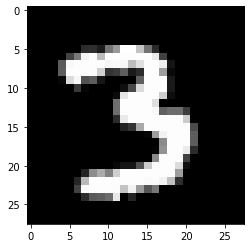

In [28]:
plt.imshow(xtest[500].reshape(28,28),cmap='gray')

In [30]:
import cv2
f = cv2.resize(xtest[500],(200,200))

error: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3598: error: (-215:Assertion failed) func != 0 in function 'resize'


In [32]:
xtrain[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      